### LearningRateScheduler Callback - Scheduler function

In [2]:
import tensorflow as tf
import numpy as np

def scheduler_exp(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr*np.exp(-1.0)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential([
    Dense(10)
])
model.compile(optimizer=SGD(), loss='mse')

print('first learning rated: ', round(model.optimizer.lr.numpy(), 5))

lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)

history = model.fit(
    np.arange(100).reshape(5, 20),
    np.zeros(5),
    epochs=15,
    callbacks=[lr_scheduler],
    verbose=1
)

first learning rated:  0.01
Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009999999776482582.
1/1 [==============================] - 0s 393ms/step - loss: 5348.5322
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0036787943294869607.
1/1 [==============================] - 0s 3ms/step - loss: 90264680.0000
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0013533527735202996.
1/1 [==============================] - 0s 4ms/step - loss: 201081110528.0000
Epoch 4/15

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0004978706704056293.
1/1 [==============================] - 0s 4ms/step - loss: 56289082212352.0000
Epoch 5/15

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00018315638425888493.
1/1 [==============================] - 0s 3ms/step - loss: 1716975587819520.0000
Epoch 6/15

Epoch 00006: LearningRateScheduler reducing learning rate to 6.73794688923822e-05.
1/1 [===========

### Scheduler_exp function visualization

In [4]:
def scheduler_exp(epoch):
    initial_lr = 0.01
    if epoch < 1:
        return initial_lr
    else:
        return initial_lr * np.exp(-1.0)**epoch

model = Sequential([
    Dense(10)
])
model.compile(optimizer=SGD(), loss='mse')

print('first learning rated: ', round(model.optimizer.lr.numpy(), 5))

lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)

history = model.fit(
    np.arange(100).reshape(5, 20),
    np.zeros(5),
    epochs=15,
    callbacks=[lr_scheduler],
    verbose=1
)

first learning rated:  0.01
Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
1/1 [==============================] - 0s 221ms/step - loss: 5774.0850
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0036787944117144234.
1/1 [==============================] - 0s 5ms/step - loss: 97514088.0000
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0013533528323661271.
1/1 [==============================] - 0s 3ms/step - loss: 217230475264.0000
Epoch 4/15

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0004978706836786395.
1/1 [==============================] - 0s 3ms/step - loss: 60809824698368.0000
Epoch 5/15

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00018315638888734184.
1/1 [==============================] - 0s 3ms/step - loss: 1854870747348992.0000
Epoch 6/15

Epoch 00006: LearningRateScheduler reducing learning rate to 6.737946999085469e-05.
1/1 [==========================

In [5]:
epochs_list = range(30)
lr_list = [scheduler_exp(epoch) for epoch in epochs_list]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_scheduler(epochs_list, lr_list, title=None):
    plt.figure(figsize=(6, 4))
    plt.plot(epochs_list, lr_list)
    plt.xlabel('epochs')
    plt.ylabel('learning rate')
    plt.title(title)

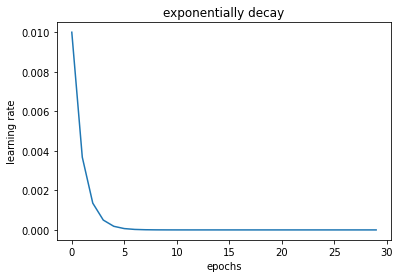

In [7]:
plot_scheduler(epochs_list, lr_list, 'exponentially decay')

### LearningRateScheduler Callbacks - Step Decay function

epoch:  0 lr:  0.1
epoch:  1 lr:  0.1
epoch:  2 lr:  0.1
epoch:  3 lr:  0.1
epoch:  4 lr:  0.1
epoch:  5 lr:  0.05
epoch:  6 lr:  0.05
epoch:  7 lr:  0.05
epoch:  8 lr:  0.05
epoch:  9 lr:  0.05
epoch:  10 lr:  0.025
epoch:  11 lr:  0.025
epoch:  12 lr:  0.025
epoch:  13 lr:  0.025
epoch:  14 lr:  0.025
epoch:  15 lr:  0.0125
epoch:  16 lr:  0.0125
epoch:  17 lr:  0.0125
epoch:  18 lr:  0.0125
epoch:  19 lr:  0.0125
epoch:  20 lr:  0.00625
epoch:  21 lr:  0.00625
epoch:  22 lr:  0.00625
epoch:  23 lr:  0.00625
epoch:  24 lr:  0.00625
epoch:  25 lr:  0.003125
epoch:  26 lr:  0.003125
epoch:  27 lr:  0.003125
epoch:  28 lr:  0.003125
epoch:  29 lr:  0.003125


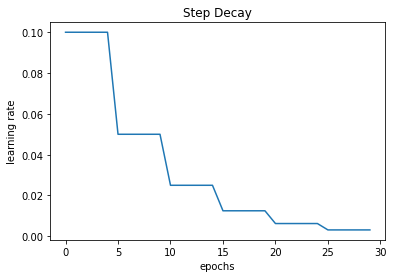

In [8]:
import tensorflow as tf

def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 5.0
    lr = initial_lr * (drop ** np.floor((epoch) / epochs_drop))
    print('epoch: ', epoch, 'lr: ', lr)
    return lr

lr_list = [step_decay(epoch) for epoch in epochs_list]
plot_scheduler(epochs_list, lr_list, title='Step Decay')

In [9]:
model = Sequential([
    Dense(10)
])
model.compile(optimizer=SGD(), loss='mse')

print('first learning rated: ', round(model.optimizer.lr.numpy(), 5))

lr_scheduler = LearningRateScheduler(step_decay, verbose=1)

history = model.fit(
    np.arange(100).reshape(5, 20),
    np.zeros(5),
    epochs=15,
    callbacks=[lr_scheduler],
    verbose=1
)

first learning rated:  0.01
Epoch 1/15
epoch:  0 lr:  0.1

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
1/1 [==============================] - 0s 211ms/step - loss: 2429.6953
Epoch 2/15
epoch:  1 lr:  0.1

Epoch 00002: LearningRateScheduler reducing learning rate to 0.1.
1/1 [==============================] - 0s 4ms/step - loss: 4156066304.0000
Epoch 3/15
epoch:  2 lr:  0.1

Epoch 00003: LearningRateScheduler reducing learning rate to 0.1.
1/1 [==============================] - 0s 4ms/step - loss: 7123153868292096.0000
Epoch 4/15
epoch:  3 lr:  0.1

Epoch 00004: LearningRateScheduler reducing learning rate to 0.1.
1/1 [==============================] - 0s 4ms/step - loss: 12208496355564482199552.0000
Epoch 5/15
epoch:  4 lr:  0.1

Epoch 00005: LearningRateScheduler reducing learning rate to 0.1.
1/1 [==============================] - 0s 4ms/step - loss: 20924352538413042455946461184.0000
Epoch 6/15
epoch:  5 lr:  0.05

Epoch 00006: LearningRateScheduler reducing le

### Cosine Decay

In [10]:
cos_decay = tf.keras.experimental.CosineDecay(initial_learning_rate=1e-2, decay_steps=30, alpha=1e-2)

In [11]:
type(cos_decay)

tensorflow.python.keras.optimizer_v2.learning_rate_schedule.CosineDecay

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_scheduler(epochs_list, lr_list, title=None):
    plt.figure(figsize=(6, 4))
    plt.plot(epochs_list, lr_list)
    plt.xlabel('epochs')
    plt.ylabel('learning rate')
    plt.title(title)

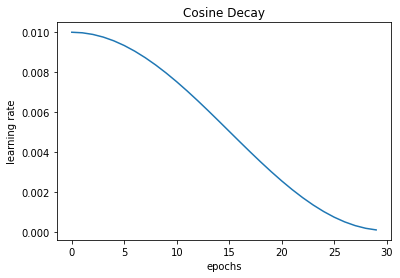

In [13]:
steps_list = range(0, 30)
lr_list = cos_decay(steps_list)

plot_scheduler(steps_list, lr_list, 'Cosine Decay')

In [15]:
model = tf.keras.models.Sequential([
    Dense(10)
])

model.compile(
    tf.keras.optimizers.Adam(learning_rate=cos_decay),
    loss='mse'
)

history = model.fit(
    np.arange(100).reshape(5, 20),
    np.zeros(5),
    epochs=15,
    verbose=1
)

Epoch 1/15
1/1 [==============================] - 0s 276ms/step - loss: 3346.3660
Epoch 2/15
1/1 [==============================] - 0s 3ms/step - loss: 2373.5422
Epoch 3/15
1/1 [==============================] - 0s 3ms/step - loss: 1631.0647
Epoch 4/15
1/1 [==============================] - 0s 3ms/step - loss: 1073.5149
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 686.9533
Epoch 6/15
1/1 [==============================] - 0s 2ms/step - loss: 450.2389
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 325.1921
Epoch 8/15
1/1 [==============================] - 0s 3ms/step - loss: 270.2050
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 251.5873
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 246.0184
Epoch 11/15
1/1 [==============================] - 0s 2ms/step - loss: 239.9137
Epoch 12/15
1/1 [==============================] - 0s 3ms/step - loss: 228.1363
Epoch 13/15
1/1 [==========================

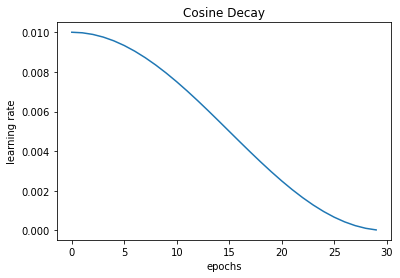

In [16]:
decay_steps = 30
alpha = 0.0
initial_learning_rate = 0.01

def decayed_learning_rate(step):
    step = min(step, decay_steps)
    cosine_decay = 0.5 * (1 + np.cos(np.pi * step / decay_steps))
    decayed = (1 - alpha) * cosine_decay + alpha
    return initial_learning_rate * decayed

steps_list = range(0, 30)
lr_list = [decayed_learning_rate(step) for step in steps_list]

plot_scheduler(steps_list, lr_list, 'Cosine Decay')

### Cosine Decay Restart(Cosine Annealing)

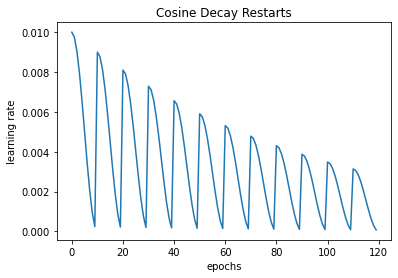

In [17]:
from tensorflow.keras.experimental import CosineDecayRestarts

cos_decay_restarts = CosineDecayRestarts(initial_learning_rate=0.01, first_decay_steps=10, t_mul=1, m_mul=0.9, alpha=0)
steps_list = range(0, 120)
lr_list = cos_decay_restarts(steps_list)

plot_scheduler(steps_list, lr_list, 'Cosine Decay Restarts')

In [19]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.Adam(learning_rate=cos_decay_restarts), loss='mse')

history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, verbose=1)

Epoch 1/15
1/1 [==============================] - 0s 346ms/step - loss: 9523.0029
Epoch 2/15
1/1 [==============================] - 0s 2ms/step - loss: 7737.0259
Epoch 3/15
1/1 [==============================] - 0s 2ms/step - loss: 6221.3647
Epoch 4/15
1/1 [==============================] - 0s 2ms/step - loss: 5000.8408
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 4072.8621
Epoch 6/15
1/1 [==============================] - 0s 2ms/step - loss: 3407.5977
Epoch 7/15
1/1 [==============================] - 0s 2ms/step - loss: 2959.4177
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 2680.1292
Epoch 9/15
1/1 [==============================] - 0s 3ms/step - loss: 2525.5815
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 2457.2788
Epoch 11/15
1/1 [==============================] - 0s 3ms/step - loss: 2440.2104
Epoch 12/15
1/1 [==============================] - 0s 3ms/step - loss: 1876.2900
Epoch 13/15
1/1 [==================

### Ramp Up and Step Down Decay

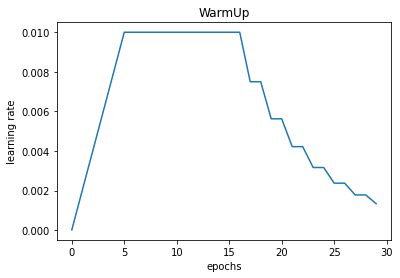

In [20]:
LR_START = 1e-5
LR_MAX = 1e-2
LR_RAMPUP_EPOCHS = 5
LR_SUSTAIN_EPOCHS = 10
LR_STEP_DECAY = 0.75

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = ((LR_MAX - LR_START) / LR_RAMPUP_EPOCHS) * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
    #print('epoch:', epoch, 'lr:', lr)
    return lr

lr_list = [lrfn(epoch) for epoch  in epochs_list]

plot_scheduler(epochs_list, lr_list, title='WarmUp')

In [21]:
def lrfn(epoch):
    LR_START = 1e-5
    LR_MAX = 1e-2
    LR_RAMPUP_EPOCHS = 3
    LR_SUSTAIN_EPOCHS = 3
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = ((LR_MAX - LR_START) / LR_RAMPUP_EPOCHS) * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        
        print('epoch:', epoch, 'lr:', lr)
        
        return lr
    
    # 반드시 내포 함수인 calc_fn(epoch)를 호출해야함. 
    return calc_fn(epoch)

In [22]:
import tensorflow as tf
import numpy as np


model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lrfn)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=30, callbacks=[lr_scheduler], verbose=1)

Epoch 1/30
epoch: 0 lr: 1e-05
1/1 [==============================] - 0s 222ms/step - loss: 3571.3813
Epoch 2/30
epoch: 1 lr: 0.00334
1/1 [==============================] - 0s 4ms/step - loss: 2699.2192
Epoch 3/30
epoch: 2 lr: 0.00667
1/1 [==============================] - 0s 4ms/step - loss: 4917589.0000
Epoch 4/30
epoch: 3 lr: 0.01
1/1 [==============================] - 0s 5ms/step - loss: 36699447296.0000
Epoch 5/30
epoch: 4 lr: 0.01
1/1 [==============================] - 0s 4ms/step - loss: 620379705966592.0000
Epoch 6/30
epoch: 5 lr: 0.01
1/1 [==============================] - 0s 4ms/step - loss: 10487104522332143616.0000
Epoch 7/30
epoch: 6 lr: 0.01
1/1 [==============================] - 0s 4ms/step - loss: 177277515989592557223936.0000
Epoch 8/30
epoch: 7 lr: 0.01
1/1 [==============================] - 0s 4ms/step - loss: 2996757987074997954927394816.0000
Epoch 9/30
epoch: 8 lr: 0.0075
1/1 [==============================] - 0s 4ms/step - loss: 50658189232298664412683354243072.000

### Cosine Decay Callback Customized

In [23]:
from collections.abc import Iterable
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.framework import constant_op
import math


class CosineDecayCB(tf.keras.callbacks.Callback):
    def __init__(self, initial_learning_rate, decay_steps):
        super(CosineDecayCB, self).__init__()
        self.initial_learning_rate = initial_learning_rate
        self.decay_steps = decay_steps
        self.batch_step = 0
        self.calc_lr = 0.0

    def on_train_batch_begin(self, step, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # optimizer의 현재 learning rate를 가져옴. 
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # schedule 함수에 batch_step과 lr을 입력하여 step에 따른 lr 계산. 
        scheduled_lr = self.schedule(self.batch_step, lr)
        # 계산된 scheduled_lr을 optimizer의 lr로 입력. 
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        self.batch_step += 1
        self.calc_lr = scheduled_lr
        
    def on_epoch_end(self, epoch, logs=None):
        print('learning rate:', self.calc_lr)
        
    # cosine decay learning rate를 step 별로 계산. 
    def schedule(self, step, lr):
        def decayed_learning_rate(step, lr):
            step = min(step, self.decay_steps)
            cosine_decay = 0.5 * (1 + np.cos(np.pi * step / self.decay_steps))
            decayed = (1 - alpha) * cosine_decay + alpha
            return lr * decayed
        
        return decayed_learning_rate(step, lr)

In [24]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

cosine_scheduler = CosineDecayCB(0.01, 100)
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
#lr_monitor = LearningRateMonitor()
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=30, callbacks=[cosine_scheduler], verbose=1)

Epoch 1/30
1/1 [==============================] - 0s 253ms/step - loss: 4404.5410
learning rate: 0.009999999776482582
Epoch 2/30
1/1 [==============================] - 0s 2ms/step - loss: 3189.6836
learning rate: 0.009997532578366386
Epoch 3/30
1/1 [==============================] - 0s 2ms/step - loss: 2197.4790
learning rate: 0.009987668779447316
Epoch 4/30
1/1 [==============================] - 0s 3ms/step - loss: 1438.0522
learning rate: 0.009965506251171758
Epoch 5/30
1/1 [==============================] - 0s 3ms/step - loss: 881.0602
learning rate: 0.009926215885098146
Epoch 6/30
1/1 [==============================] - 0s 2ms/step - loss: 502.7024
learning rate: 0.00986511165178973
Epoch 7/30
1/1 [==============================] - 0s 3ms/step - loss: 281.8984
learning rate: 0.009777742546603758
Epoch 8/30
1/1 [==============================] - 0s 2ms/step - loss: 186.1867
learning rate: 0.00966000258860012
Epoch 9/30
1/1 [==============================] - 0s 4ms/step - loss: 174.42

### Cosine Decay Restart Callback Customized

In [25]:
from tensorflow.keras import backend as K

class LearningRateMonitor(Callback):
    # start of training
    def on_train_begin(self, logs={}):
        self.lrates = list()

    # end of each training epoch
    def on_epoch_end(self, epoch, logs={}):
        # get and store the learning rate
        optimizer = self.model.optimizer
        lrate = float(K.get_value(self.model.optimizer.lr))
        print('learning rate:', lrate)
        self.lrates.append(lrate)

In [26]:
# https://gist.github.com/jeremyjordan/5a222e04bb78c242f5763ad40626c452

from collections.abc import Iterable
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.framework import constant_op
import math


class CosineDecayRestarts(tf.keras.callbacks.Callback):
    def __init__(self, initial_learning_rate, first_decay_steps, alpha=0.0, t_mul=2.0, m_mul=1.0):
        super(CosineDecayRestarts, self).__init__()
        self.initial_learning_rate = initial_learning_rate
        self.first_decay_steps = first_decay_steps
        self.alpha = alpha
        self.t_mul = t_mul
        self.m_mul = m_mul
        self.batch_step = 0

    def on_train_batch_begin(self, step, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate from model's optimizer.
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # Call schedule function to get the scheduled learning rate.
        scheduled_lr = self.schedule(self.batch_step, lr)
        # Set the value back to the optimizer before this epoch starts
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        self.batch_step += 1

    def schedule(self, step, lr):
        def compute_step(completed_fraction, geometric=False):
            """Helper for `cond` operation."""
            if geometric:
                i_restart = math_ops.floor(
                  math_ops.log(1.0 - completed_fraction * (1.0 - self.t_mul)) /
                  math_ops.log(self.t_mul))

                sum_r = (1.0 - self.t_mul**i_restart) / (1.0 - self.t_mul)
                completed_fraction = (completed_fraction - sum_r) / self.t_mul**i_restart

            else:
                i_restart = math_ops.floor(completed_fraction)
                completed_fraction -= i_restart

            return i_restart, completed_fraction

        completed_fraction = step / self.first_decay_steps

        i_restart, completed_fraction = control_flow_ops.cond(
          math_ops.equal(self.t_mul, 1.0),
          lambda: compute_step(completed_fraction, geometric=False),
          lambda: compute_step(completed_fraction, geometric=True))

        m_fac = self.m_mul**i_restart
        cosine_decayed = 0.5 * m_fac * (1.0 + math_ops.cos(
          constant_op.constant(math.pi) * completed_fraction))
        decayed = (1 - self.alpha) * cosine_decayed + self.alpha

        return math_ops.multiply(self.initial_learning_rate, decayed)

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

cosine_scheduler = CosineDecayRestarts(0.01, 100)
lr_monitor = LearningRateMonitor()
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, callbacks=[cosine_scheduler, lr_monitor], verbose=1)

Epoch 1/15
1/1 [==============================] - 0s 255ms/step - loss: 5355.4722
learning rate: 0.009999999776482582
Epoch 2/15
1/1 [==============================] - 0s 3ms/step - loss: 4044.8071
learning rate: 0.009997531771659851
Epoch 3/15
1/1 [==============================] - 0s 4ms/step - loss: 3001.8950
learning rate: 0.009990133345127106
Epoch 4/15
1/1 [==============================] - 0s 3ms/step - loss: 2208.2590
learning rate: 0.009977809153497219
Epoch 5/15
1/1 [==============================] - 0s 4ms/step - loss: 1613.9446
learning rate: 0.009960574097931385
Epoch 6/15
1/1 [==============================] - 0s 4ms/step - loss: 1159.2463
learning rate: 0.009938441216945648
Epoch 7/15
1/1 [==============================] - 0s 3ms/step - loss: 806.5574
learning rate: 0.009911435656249523
Epoch 8/15
1/1 [==============================] - 0s 3ms/step - loss: 540.7624
learning rate: 0.0098795834928751
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 356.